<a href="https://www.kaggle.com/madhuri15/diabetes-data-analysis?scriptVersionId=88446300" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Diabetes
<div style='font-size:16px;border:2px solid #757A79;padding:10px;background-color:#EAE7ff;border-radius:8px;'>
    <b>Diabetes</b> is a chronic disease or group of metabolic disease where a person suffers from an extended level of blood glucose in the body, which is either the insulin production is inadequate, or because the body’s cells do not respond properly to insulin. The constant hyperglycemia of diabetes is related to long-haul harm, brokenness, and failure of various organs, particularly the eyes, kidneys, nerves, heart, and veins. 
    
    
The objective of this analysis is to make use of significant features, design a prediction algorithm using Machine learning and find the optimal classifier to give the closest result comparing to clinical outcomes. 
    
    
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. It contains data of only females patients from age 21 to 81.
</div>


In [1]:
# loading libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (14, 8)
plt.style.use('tableau-colorblind10')

In [2]:
# data
data = pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

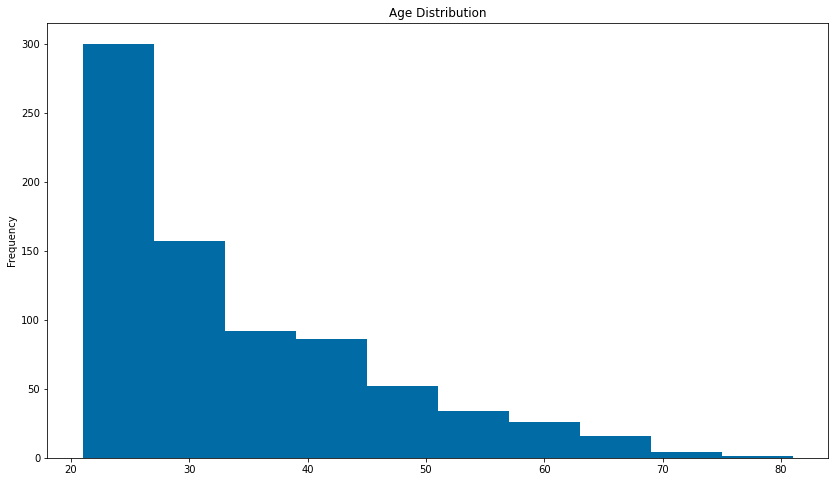

In [6]:
data.Age.plot(kind='hist', title='Age Distribution')
plt.show()

Diabetes influences a wide range of ages, including youngsters to grown-up and matured people. Above plot shows that, the age distribution from 21 to 81. while most common age of females patients is in range of 21 to 32.

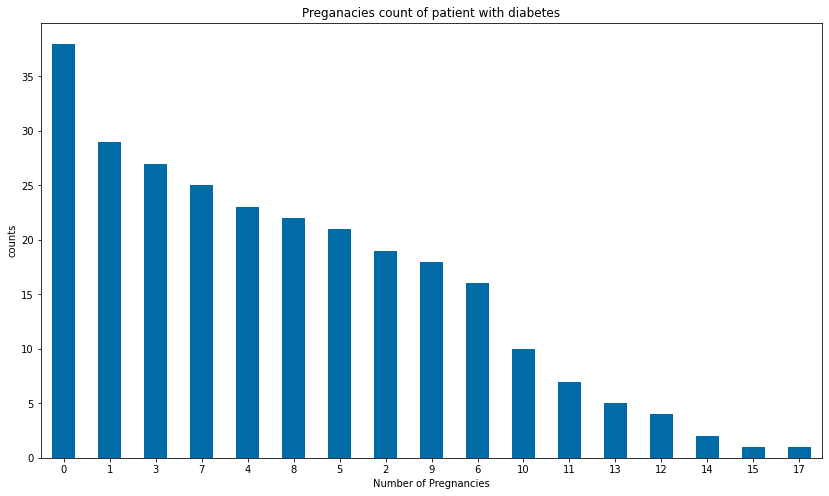

In [7]:
grouped_data = data.groupby(by=['Outcome'])

# Create dataframe with diabetic patients. 
a = grouped_data.get_group(1)

# plot
a['Pregnancies'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Number of Pregnancies')
plt.ylabel("counts")
plt.title('Preganacies count of patient with diabetes')
plt.show()

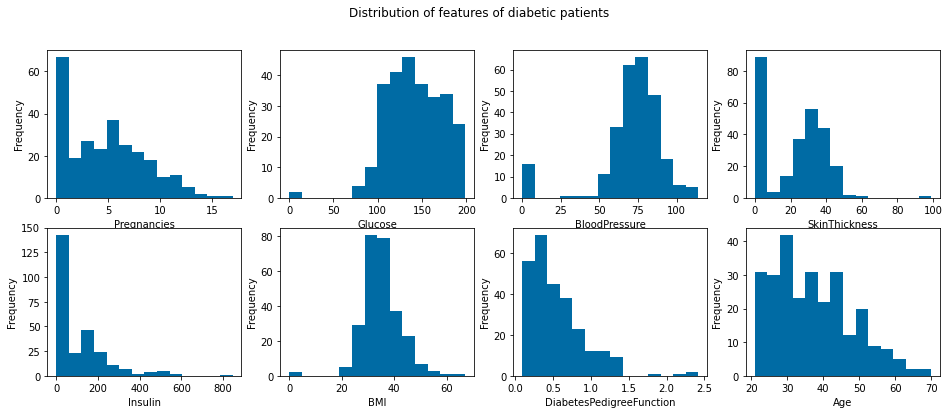

In [8]:

def plot_distribution(col, axs):
    ax_ = a[col].plot(kind='hist', bins=14, ax=axs)
    ax_.set_xlabel(col)
    
fig, ax = plt.subplots( 2,4, figsize=(16, 6))
cols = a.columns[:-1]
i = 0
for j in range(2):
    for k in range(4):
        plot_distribution(cols[i], ax[j, k])
        i += 1
        
fig.suptitle("Distribution of features of diabetic patients")
plt.show()

<div style='font-size:16px;border:2px solid #757A79;padding:10px;background-color:#EAE7ff;border-radius:8px;'>
    
 Above distribution plot shows groups in columns 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPredigreeFunctions' as well as in 'Insulin' for diabetic females.
    
</div>

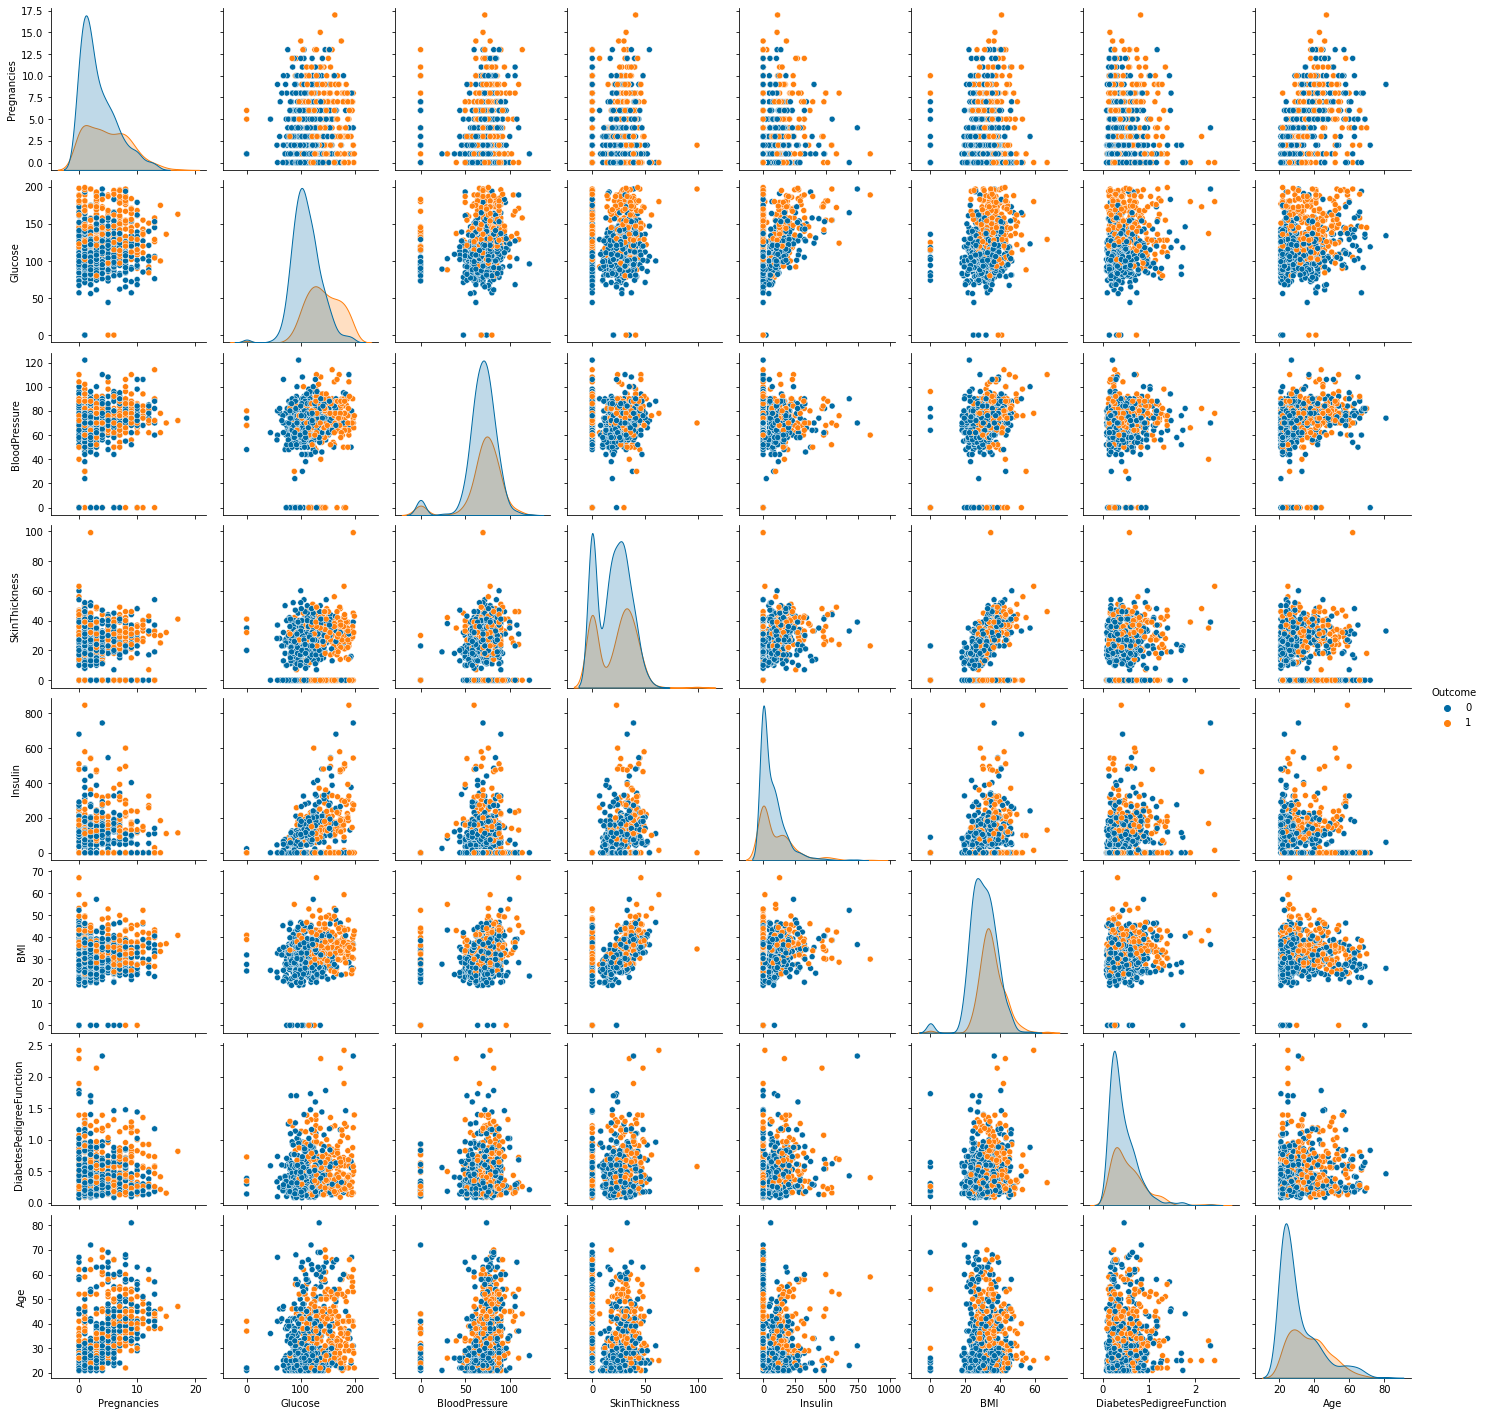

In [9]:
sns.pairplot(data, hue='Outcome')
plt.show()

<div style='font-size:16px;border:2px solid #757A79;padding:10px;background-color:#EAE7ff;border-radius:8px;'>
There are some outliers present.
</div>

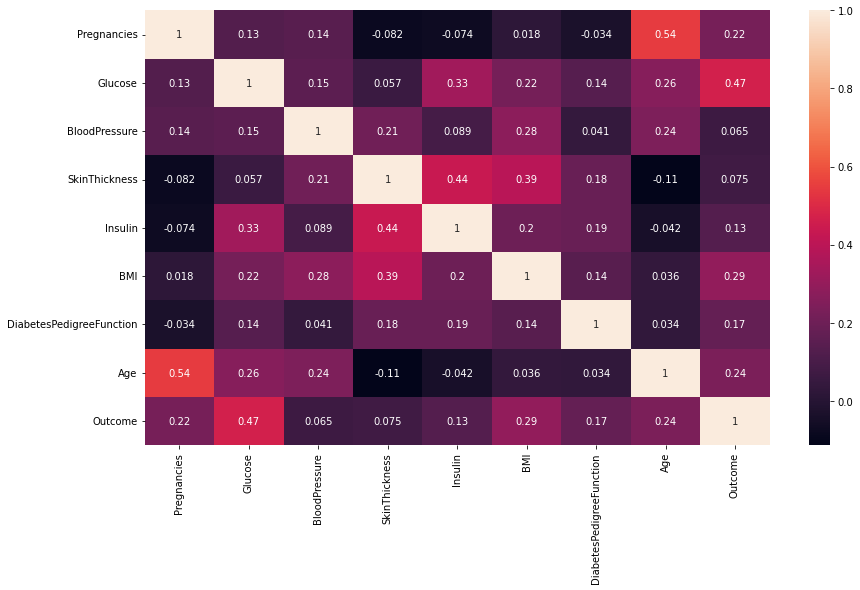

In [10]:
corr = data.corr()
sns.heatmap(corr, annot=True)
plt.show()

# Outliers

In [11]:
df = pd.DataFrame()

def remove_outlier(col):
    
    Q1 = np.quantile(data[col], 0.25)
    Q3 = np.quantile(data[col], 0.75)
    IQR = Q3 - Q1

    upper_range= Q3 + (IQR * 1.5)
    lower_range= Q1 - (IQR * 1.5)

    df[col] = np.where(data[col] > upper_range, upper_range, data[col])
    df[col] = np.where(df[col] < lower_range, lower_range, df[col])
    

for col in data.columns[:-2]:
    remove_outlier(col)

In [12]:
df['Age'] = data['Age']
df['Outcome'] = data['Outcome']
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47,1


In [13]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

X = data.drop(['Outcome'], axis=1)
y = data['Outcome']

col = X.columns
scale = preprocessing.StandardScaler().fit(X)
X_scaled = pd.DataFrame(scale.transform(X))
X_scaled.rename(columns={0:col[0], 1:col[1], 2:col[2], 3:col[3], 4:col[4], 5:col[5], 6:col[6], 7:col[7]}, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Classifier
model = RandomForestClassifier(max_depth=5, random_state=1815)
model.fit(X_train, y_train)

preds = model.predict(X_test)
acc = accuracy_score(y_test, preds)
acc

0.7662337662337663

In [14]:
model = XGBClassifier(learning_rate=0.007)
model.fit(X_train, y_train)

preds = model.predict(X_test)
acc = accuracy_score(y_test, preds)
acc

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:37:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7575757575757576